<a href="https://colab.research.google.com/github/JoeJoe1313/Time-Series-Course/blob/master/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Инсталиране на необходимите библиотеки

In [1]:
install.packages('tseries')
install.packages('forecast')
install.packages('TSA')

## Зареждане на необходимите библиотеки

In [2]:
library(TSA)
library(tseries)


Attaching package: ‘TSA’


The following objects are masked from ‘package:stats’:

    acf, arima


The following object is masked from ‘package:utils’:

    tar


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



## Определяне на класа и параметрите на модела. Проверка на $ARMA$ частта за каузалност и обратимост.

Ще разглеждаме следния времеви ред

$$X_t-0.8X_{t-1}=Z_t-0.7Z_{t-1}+0.1Z_{t-2}.$$

Можем да запишем процеса във вида 

$$(1-0.8B) X_t=(1-0.7B+0.1B^2)Z_t,$$

където ${Z_t} \sim WN(0,σ^2)$, а $B$ е шифтовият оператор $B^j X_t=X_{t-j}$.

По дефиниция процесът прилича на $ARMA(1,2)$ процес. Нека разгледаме:

*   Авторегресионният полином $ϕ(z)=1-0.8z=0$, когато $z=1.25,|1.25|>1$ (тоест $ϕ(z)≠0,∀|z|≤1$). Следователно съществува единствен $ARMA$ процес, удовлетворяващ дефиниционните уравнения, който е каузален (съответно стационарен, тъй като $ϕ(z)≠0$ за всички комплексни $z$, такива че $|z|=1$).
*   MA полиномът $θ(z)=1-0.7z+0.1z^2=0$, когато $z_1=2,|2|>1$ или $z_2=5,|5|>1$ (тоест $θ(z)≠0,∀|z|<1$). Следователно ${X_t}$ е обратим процес.

Също така, двата полинома нямат общи корени. Следователно наистина можем да говорим за $ARMA(1,2)$ процес.


## Генериране на времеви ред с дисперсия на белия шум $\sigma^2=1$ и дължина $n=200$

За да създадем симулация на дадения процес, ще използваме функцията `arima.sim`, като зададем модела с параметри `ar=c(0.8)`, `ma=c(-0.7,0.1)`, стандартно отклонение `sd=1` и брой на наблюденията `n=200`.

In [3]:
set.seed(74)
model = arima.sim(list(order=c(1, 0, 2), ar=c(0.8),ma=c(-0.7, 0.1)), sd=1, n=200)

## Оценка на модела след изследване на графика на генерирания ред, евентуални диференчни операции, $ACF$, $PACF$ и $EACF$

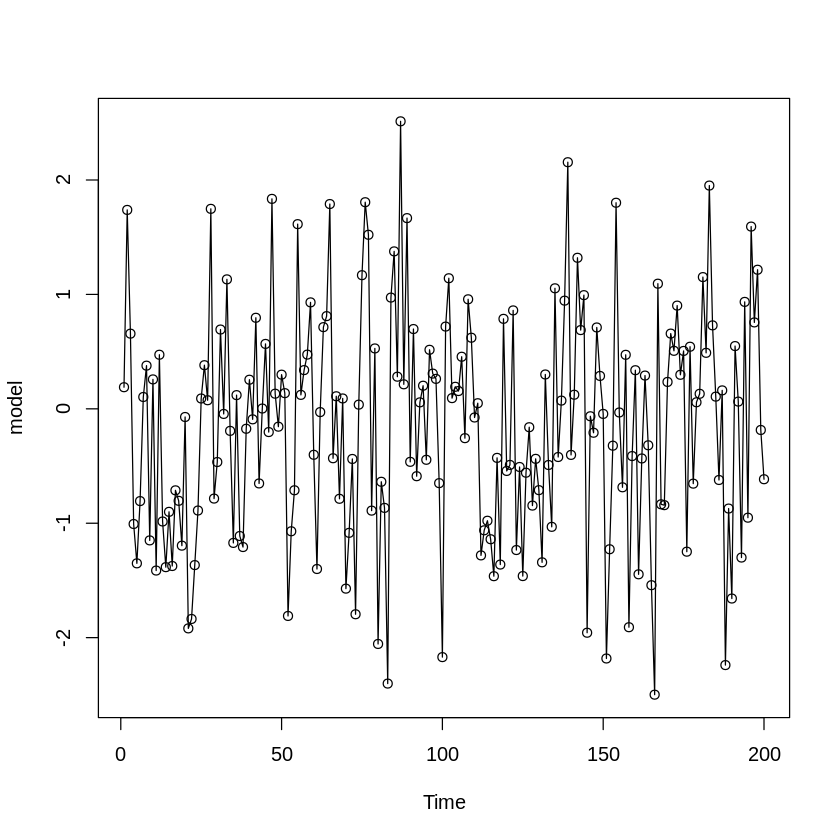

In [4]:
plot(model, type='o')

Не се забелязва тренд, сезонност или силно отличаващи се данни. Процесът изглежда стационарен, което можем да потвърдим, прилагайки теста на $Dickey-Fuller$.

In [5]:
adf.test(model)

Warning message in adf.test(model):
“p-value smaller than printed p-value”



	Augmented Dickey-Fuller Test

data:  model
Dickey-Fuller = -6.0848, Lag order = 5, p-value = 0.01
alternative hypothesis: stationary


Получаваме, че $p-value = 0.01$, тоест можем да отхвърлим, нулевата хипотеза, че процесът не е стационарен. Следователно процесът е стационарен.

Сега ще проверим дали този времеви ред принаделжи на някой $ARMA(p,q)$ процес.

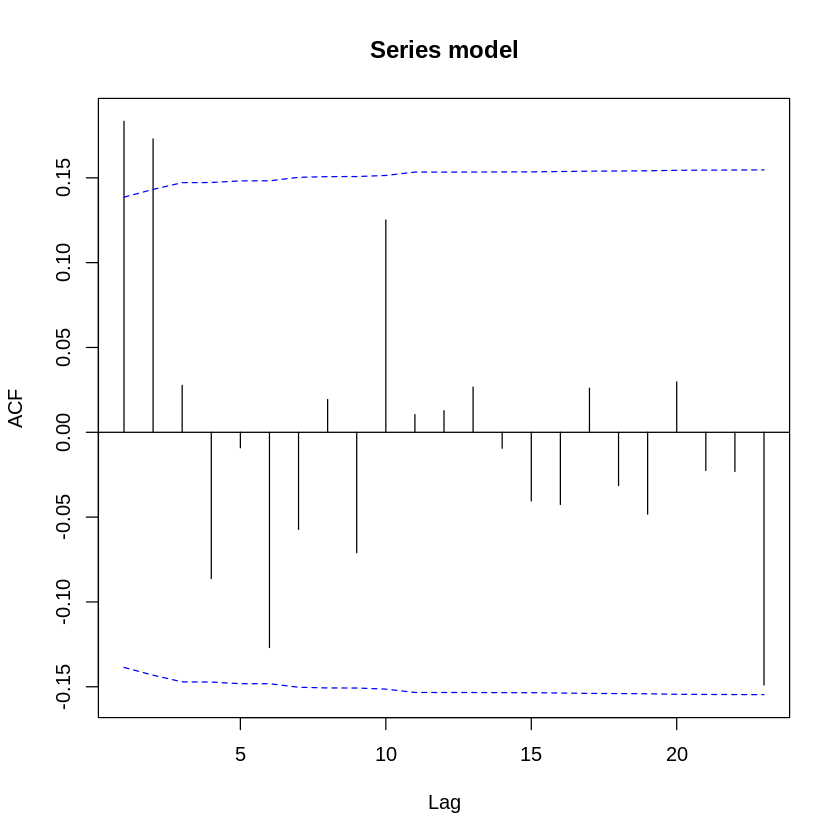

In [6]:
acf(model, ci.type='ma')

Графиката на $ACF$ показва, че $model$ процесът може да е $MA(2)$ процес.



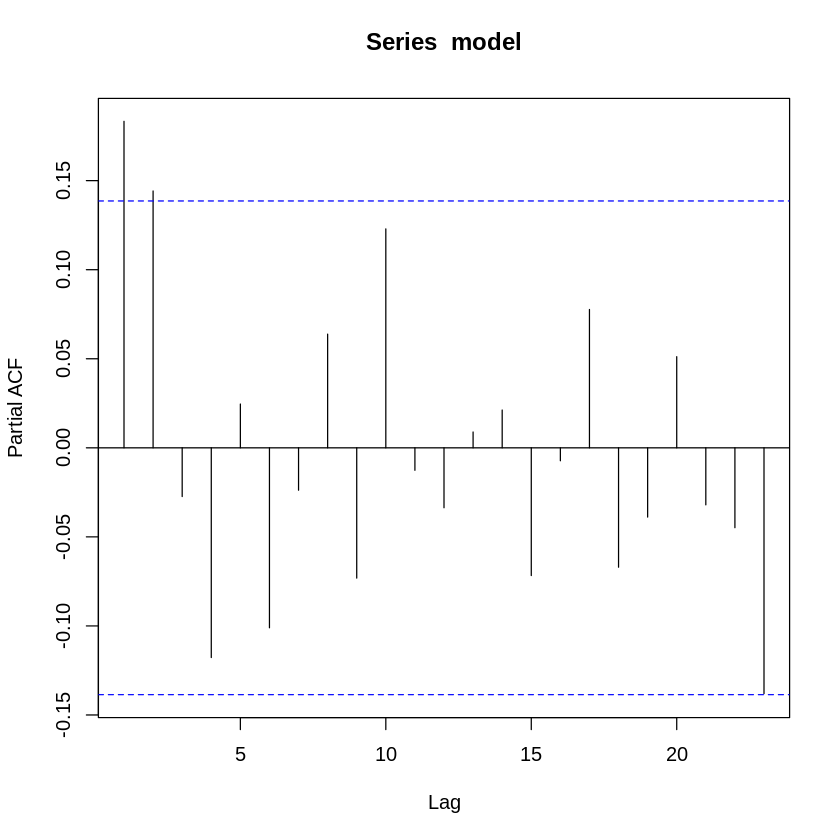

In [7]:
pacf(model)

Графиката на $PACF$ показва, чен $model$ процесът може да е $AR(1)$ процес (или евентуално $AR(2)$ процес).

In [8]:
eacf(model)

AR/MA
  0 1 2 3 4 5 6 7 8 9 10 11 12 13
0 x x o o o o o o o o o  o  o  o 
1 x x o o o o o o o o o  o  o  o 
2 x x o o o o o o o o o  o  o  o 
3 x x x o o o o o o o o  o  o  o 
4 x x o x o o o o o o o  o  o  o 
5 x x x x o o o o o o o  o  o  o 
6 x x x x o o o o o o o  o  o  o 
7 x x o x x o o o o o o  o  o  o 


Графиките на автокорелационната и частната автокорелационна функция показват, че $model$ може да е $ARMA(1,2)$ или евентуално $ARMA(2,2)$ процес, като това се потвърждава и от $EACF$. От $EACF$ излиза възможно и $ARMA(0,2)$ да е подходящ вариант.

## Сравнение на конкуриращи се модели

Ще сравним моделите, които изброихме по-нагоре. Ще изберем модела с най-малко $aic$.

In [9]:
model_1 = arima(model, order = c(0,0,2))
model_1


Call:
arima(x = model, order = c(0, 0, 2))

Coefficients:
         ma1     ma2  intercept
      0.1493  0.1986    -0.1436
s.e.  0.0687  0.0721     0.0910

sigma^2 estimated as 0.9157:  log likelihood = -275.03,  aic = 556.07

In [10]:
model_2 = arima(model, order=c(1,0,2))
model_2


Call:
arima(x = model, order = c(1, 0, 2))

Coefficients:
         ar1     ma1     ma2  intercept
      0.1511  0.0055  0.1795    -0.1432
s.e.  0.3113  0.3051  0.0866     0.0942

sigma^2 estimated as 0.9147:  log likelihood = -274.92,  aic = 557.84

In [11]:
model_3 = arima(model, order=c(2,0,2))
model_3


Call:
arima(x = model, order = c(2, 0, 2))

Coefficients:
         ar1      ar2      ma1     ma2  intercept
      0.3232  -0.1593  -0.1644  0.3026    -0.1437
s.e.  0.6463   0.3526   0.6317  0.2582     0.0918

sigma^2 estimated as 0.9135:  log likelihood = -274.79,  aic = 559.57

Моделът с най-малко $aic$ е *model_1*. Оттук нататък ще разглеждаме *model_1*.

## Анализ на остатъците

Оценка на остатъците ще направим чрез функцията `rstandard`. След това ще приложим `qqnorm` за проверка за нормалност на остатъците.



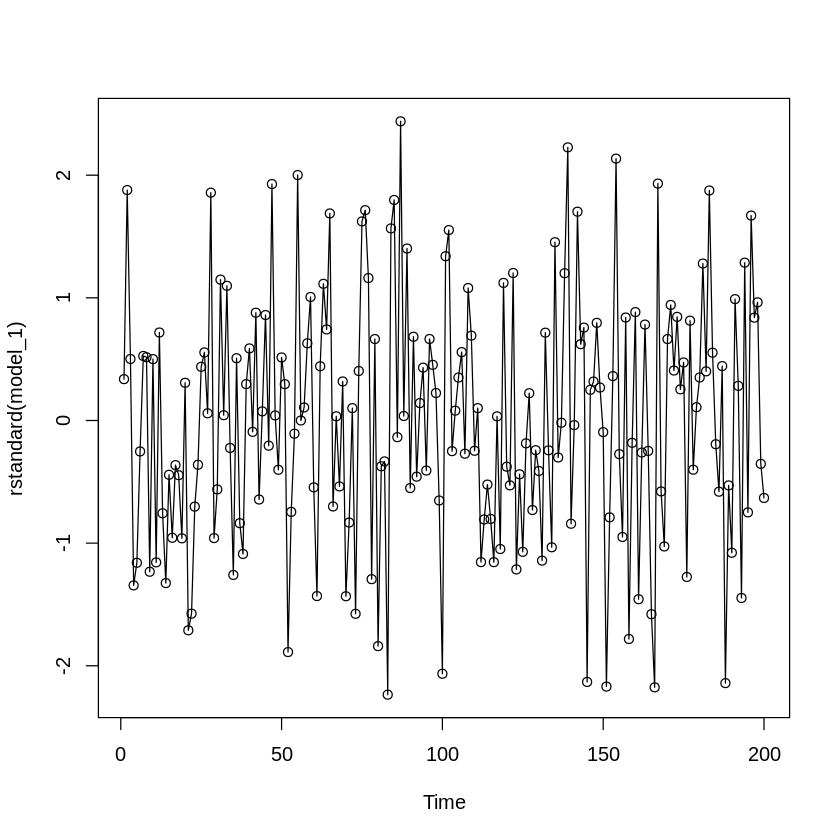

In [12]:
plot(rstandard(model_1), type='o')

Имаме равномерно разпръскване около нулата, следователно моделът е адекватен.

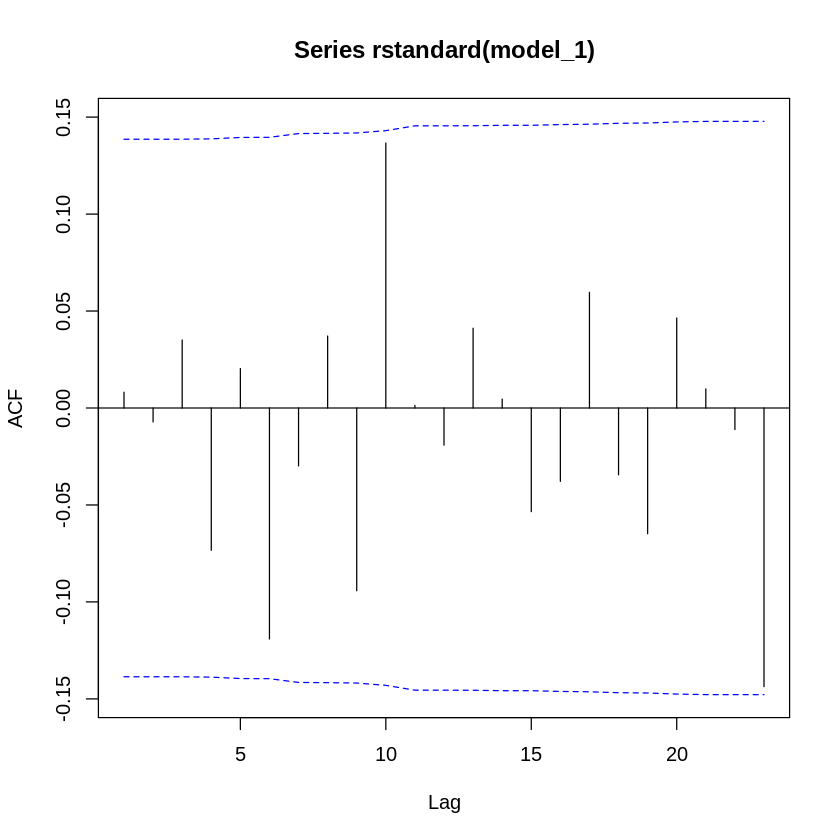

In [13]:
acf(rstandard(model_1), ci.type='ma')

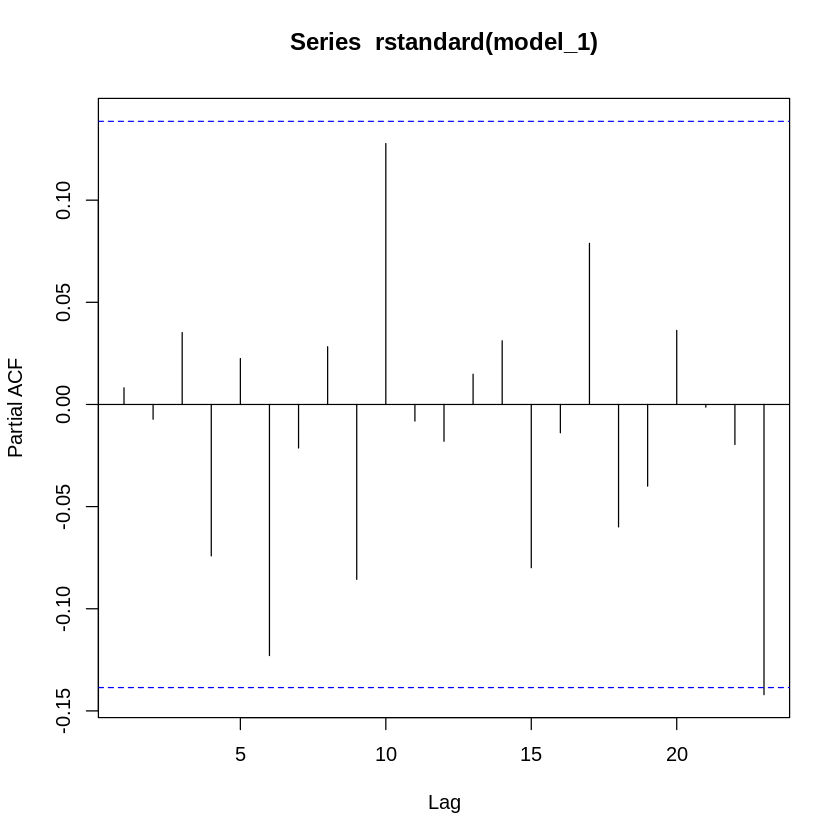

In [14]:
pacf(rstandard(model_1))

Графиките на $ACF$ и $PACF$ показват, че остатъците са изцяло в доверителния интервал, което означава, че имаме бял шум.

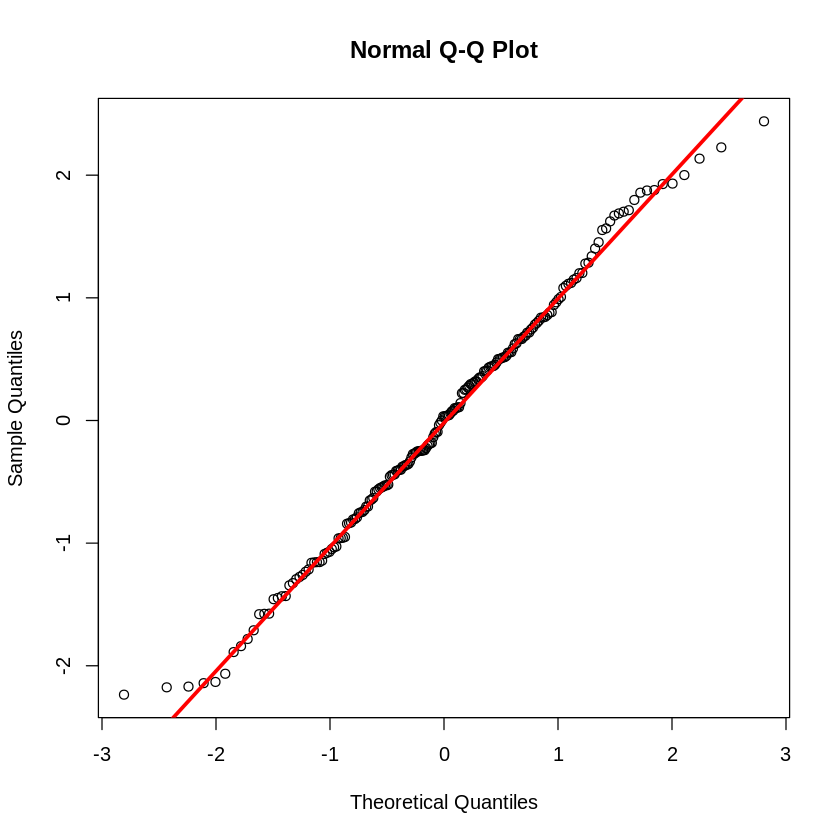

In [15]:
qqnorm(rstandard(model_1))
qqline(rstandard(model_1), col='red', lwd=3)

Графиката на остатъците показва, че са нормално разпределени тъй като няма някакви сериозни отклонения (outlier-и).Тестът на $Shapiro-Wilk$ с нулева хипотеза, че остатъците са нормално разпределени, потвърждава извода от графиката:

In [16]:
shapiro.test(rstandard(model_1))


	Shapiro-Wilk normality test

data:  rstandard(model_1)
W = 0.99296, p-value = 0.4553


## Прогнозиране за 5 перидоа напред

In [17]:
fitted_model_1 = fitted(model_1)

In [18]:
library(forecast)

Registered S3 methods overwritten by 'forecast':
  method       from
  fitted.Arima TSA 
  plot.Arima   TSA 



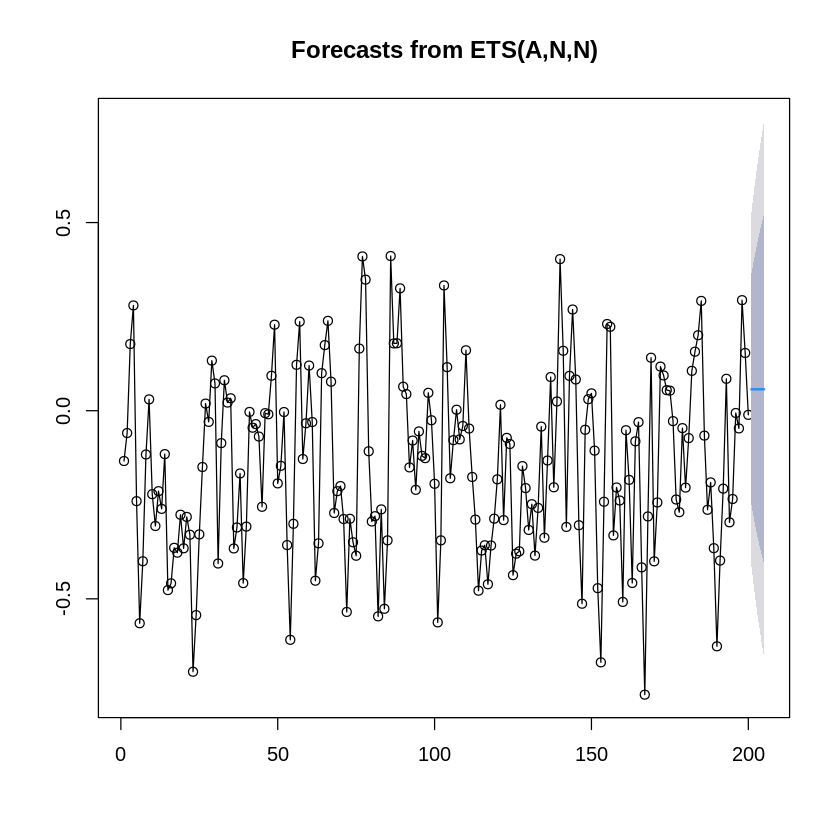

In [19]:
p = forecast(fitted_model_1, h=5)
plot(p, type='o')